In [2]:
from access import Access, weights, Datasets

import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
va_times_0_ct = pd.read_csv("/Users/cesarmontalvo/va_med_data/va_times_ct.csv", sep=",")
centroid_coords_ct = pd.read_csv("/Users/cesarmontalvo/va_med_data/centroid.coords_ct.csv", sep=",")

In [4]:
va_doc_0_ct = pd.read_csv("/Users/cesarmontalvo/va_med_data/va_doc_ct.csv", sep=",")
va_pop_0_ct = pd.read_csv("/Users/cesarmontalvo/va_med_data/va_pop_ct.csv", sep=",") 

In [5]:
va_pop_0_ct

,Unnamed: 0,geoid,pop
0,1,51041100206,6513
1,2,51059481202,6088
2,3,51710004800,1418
3,4,51117930300,3644
4,5,51143010300,3869
...,...,...,...
1894,1895,51590000300,3021
1895,1896,51197050200,6748
1896,1897,51700031602,4065
1897,1898,51059482202,4140


In [6]:
va_doc_0_ct

,Unnamed: 0,geoid,doc
0,1,1.100100e+10,7
1,2,1.100100e+10,333
2,3,1.100100e+10,5
3,4,1.100100e+10,7
4,5,1.100100e+10,6
...,...,...,...
3000,3001,5.410197e+10,15
3001,3002,5.410900e+10,2
3002,3003,5.410900e+10,3
3003,3004,5.410900e+10,23


In [7]:
va_times_0_ct

,Unnamed: 0,dest,origin,euclidean,cost
0,1,51041100206,5.110761e+10,180347.229741,168.129798
1,2,51059481202,5.110761e+10,17612.225197,16.419104
2,3,51710004800,5.110761e+10,269521.547998,251.263096
3,4,51117930300,5.110761e+10,269756.267399,251.481915
4,5,51143010300,5.110761e+10,290750.919567,271.054307
...,...,...,...,...,...
83776279,83776280,51590000300,1.100101e+10,328347.580247,306.104021
83776280,83776281,51197050200,1.100101e+10,426662.374112,397.758584
83776281,83776282,51700031602,1.100101e+10,204885.580254,191.005824
83776282,83776283,51059482202,1.100101e+10,32442.085332,30.244331


In [22]:
va_times_0_ct.rename(columns={'dest': 'origin', 'origin': 'dest'}, inplace=True)


In [23]:
va_times_0_ct

,Unnamed: 0,origin,dest,euclidean,cost
0,1,51041100206,5.110761e+10,180347.229741,168.129798
1,2,51059481202,5.110761e+10,17612.225197,16.419104
2,3,51710004800,5.110761e+10,269521.547998,251.263096
3,4,51117930300,5.110761e+10,269756.267399,251.481915
4,5,51143010300,5.110761e+10,290750.919567,271.054307
...,...,...,...,...,...
83776279,83776280,51590000300,1.100101e+10,328347.580247,306.104021
83776280,83776281,51197050200,1.100101e+10,426662.374112,397.758584
83776281,83776282,51700031602,1.100101e+10,204885.580254,191.005824
83776282,83776283,51059482202,1.100101e+10,32442.085332,30.244331


In [8]:
centroid_coords_ct

,Unnamed: 0,X,Y
0,1,-77.533491,37.454773
1,2,-77.370777,38.942593
2,3,-76.279912,36.844638
3,4,-78.250040,36.727377
4,5,-79.479920,36.988683
...,...,...,...
1894,1895,-79.391149,36.604470
1895,1896,-81.221251,36.972625
1896,1897,-76.466805,37.070115
1897,1898,-77.346027,38.956985


1) create columnn with coordinates 
2) create point of geometry

In [9]:
centroid_coords_ct["Coordinates"] = list(zip(centroid_coords_ct.X, centroid_coords_ct.Y))


In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

In [11]:
centroid_coords_ct["geometry"] = centroid_coords_ct["Coordinates"].apply(Point)

Join va_pop with centroid_coords_doc to obtain geoid, pop and geometry

In [12]:
import pandas as pd
import numpy as np

va_population_ct = pd.concat([centroid_coords_ct, va_pop_0_ct],  axis=1, ignore_index=False)
va_population_ct

,Unnamed: 0,X,Y,Coordinates,geometry,Unnamed: 0,geoid,pop
0,1,-77.533491,37.454773,"(-77.53349129274869, 37.4547728146496)",POINT (-77.53349129274869 37.4547728146496),1,51041100206,6513
1,2,-77.370777,38.942593,"(-77.37077724798091, 38.9425931851981)",POINT (-77.37077724798091 38.9425931851981),2,51059481202,6088
2,3,-76.279912,36.844638,"(-76.27991158499741, 36.844637997782606)",POINT (-76.27991158499741 36.84463799778261),3,51710004800,1418
3,4,-78.250040,36.727377,"(-78.25003998702029, 36.727377274061396)",POINT (-78.25003998702029 36.7273772740614),4,51117930300,3644
4,5,-79.479920,36.988683,"(-79.47992043745029, 36.98868283123161)",POINT (-79.47992043745029 36.98868283123161),5,51143010300,3869
...,...,...,...,...,...,...,...,...
1894,1895,-79.391149,36.604470,"(-79.391148897976, 36.604470015459)",POINT (-79.391148897976 36.604470015459),1895,51590000300,3021
1895,1896,-81.221251,36.972625,"(-81.22125135400199, 36.972624986127)",POINT (-81.22125135400199 36.972624986127),1896,51197050200,6748
1896,1897,-76.466805,37.070115,"(-76.466804851881, 37.0701152891293)",POINT (-76.46680485188099 37.0701152891293),1897,51700031602,4065
1897,1898,-77.346027,38.956985,"(-77.3460273941185, 38.956984983237795)",POINT (-77.34602739411849 38.9569849832378),1898,51059482202,4140


In [13]:
va_pop_ct = va_population_ct[["geoid", "pop", "geometry"]]
va_pop_ct

,geoid,pop,geometry
0,51041100206,6513,POINT (-77.53349129274869 37.4547728146496)
1,51059481202,6088,POINT (-77.37077724798091 38.9425931851981)
2,51710004800,1418,POINT (-76.27991158499741 36.84463799778261)
3,51117930300,3644,POINT (-78.25003998702029 36.7273772740614)
4,51143010300,3869,POINT (-79.47992043745029 36.98868283123161)
...,...,...,...
1894,51590000300,3021,POINT (-79.391148897976 36.604470015459)
1895,51197050200,6748,POINT (-81.22125135400199 36.972624986127)
1896,51700031602,4065,POINT (-76.46680485188099 37.0701152891293)
1897,51059482202,4140,POINT (-77.34602739411849 38.9569849832378)


In [14]:
result = pd.merge(va_pop_ct, va_doc_0_ct, how="left", on=["geoid", "geoid"])
result

,geoid,pop,geometry,Unnamed: 0,doc
0,51041100206,6513,POINT (-77.53349129274869 37.4547728146496),NaN,NaN
1,51059481202,6088,POINT (-77.37077724798091 38.9425931851981),1850.0,26.0
2,51710004800,1418,POINT (-76.27991158499741 36.84463799778261),NaN,NaN
3,51117930300,3644,POINT (-78.25003998702029 36.7273772740614),NaN,NaN
4,51143010300,3869,POINT (-79.47992043745029 36.98868283123161),2154.0,3.0
...,...,...,...,...,...
1894,51590000300,3021,POINT (-79.391148897976 36.604470015459),NaN,NaN
1895,51197050200,6748,POINT (-81.22125135400199 36.972624986127),2347.0,55.0
1896,51700031602,4065,POINT (-76.46680485188099 37.0701152891293),2542.0,19.0
1897,51059482202,4140,POINT (-77.34602739411849 38.9569849832378),1857.0,27.0


In [15]:
va_doc_ct = result[["geoid", "doc", "geometry"]]
va_doc_ct

,geoid,doc,geometry
0,51041100206,NaN,POINT (-77.53349129274869 37.4547728146496)
1,51059481202,26.0,POINT (-77.37077724798091 38.9425931851981)
2,51710004800,NaN,POINT (-76.27991158499741 36.84463799778261)
3,51117930300,NaN,POINT (-78.25003998702029 36.7273772740614)
4,51143010300,3.0,POINT (-79.47992043745029 36.98868283123161)
...,...,...,...
1894,51590000300,NaN,POINT (-79.391148897976 36.604470015459)
1895,51197050200,55.0,POINT (-81.22125135400199 36.972624986127)
1896,51700031602,19.0,POINT (-76.46680485188099 37.0701152891293)
1897,51059482202,27.0,POINT (-77.34602739411849 38.9569849832378)


In [30]:
va_doc_ct['doc'].isna().sum()

610

replace NaN for zero

In [31]:
va_doc_ct['doc'] = va_doc_ct['doc'].fillna(0)
va_doc_ct

,geoid,doc,geometry
0,51041100206,0.0,POINT (-77.53349 37.45477)
1,51059481202,26.0,POINT (-77.37078 38.94259)
2,51710004800,0.0,POINT (-76.27991 36.84464)
3,51117930300,0.0,POINT (-78.25004 36.72738)
4,51143010300,3.0,POINT (-79.47992 36.98868)
...,...,...,...
1894,51590000300,0.0,POINT (-79.39115 36.60447)
1895,51197050200,55.0,POINT (-81.22125 36.97262)
1896,51700031602,19.0,POINT (-76.46680 37.07012)
1897,51059482202,27.0,POINT (-77.34603 38.95698)


In [16]:
va_doc_ct['doc'].sum()

19579.0

IMPORTANT: df must be in GeoDataFrame format

In [32]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

va_pop_ct = GeoDataFrame(va_pop_ct, crs="EPSG:4326")
va_doc_ct = GeoDataFrame(va_doc_ct, crs="EPSG:4326")
#va_times = GeoDataFrame(va_times, crs="EPSG:4326")

# Create the access Object

In [33]:
B = Access(demand_df            = va_pop_ct,
           demand_index         = 'geoid',
           demand_value         = 'pop',
           supply_df            = va_doc_ct,
           supply_index         = 'geoid',
           supply_value         = 'doc',
           cost_df              = va_times_0_ct,
           cost_origin          = 'origin',
           cost_dest            = 'dest',
           cost_name            = 'cost',
           neighbor_cost_df     = va_times_0_ct,
           neighbor_cost_origin = 'origin',
           neighbor_cost_dest   = 'dest',
           neighbor_cost_name   = 'cost')

In [26]:
fn30 = weights.step_fn({10 : 1, 20 : 0.68, 30 : 0.22})
fn60 = weights.step_fn({20 : 1, 40 : 0.68, 60 : 0.22})

gaussian = weights.gaussian(20)

gravity = weights.gravity(scale = 60, alpha = -1)

In [50]:
gaussian

<function access.weights.gaussian.<locals>.<lambda>(x)>

In [34]:
print(B.demand_df.crs)
print(B.supply_df.crs)

EPSG:4326
EPSG:4326


In [35]:
B.demand_df = B.demand_df.to_crs(epsg = 3528)
B.supply_df = B.supply_df.to_crs(epsg = 3528)

# Ready to go

In [36]:
B.fca_ratio             (name = "fca",      max_cost = 15)

/Users/cesarmontalvo/opt/anaconda3/lib/python3.8/site-packages/access/fca.py:137: UserWarning: some tracts may be unaccounted for in supply_cost
  warnings.warn("some tracts may be unaccounted for in supply_cost", stacklevel = 1)


,fca_doc
geoid,
51001090100,0.001590
51001090200,0.001319
51001090300,0.000689
51001090400,0.005906
51001090500,0.005945
...,...
51840000100,0.017998
51840000201,0.018638
51840000202,0.018638


In [40]:
B.access_df['fca_doc'].isna().sum()

610

In [37]:
B.norm_access_df.columns

Index(['fca_doc'], dtype='object')

# Plots

In [38]:
va_map = va_doc_ct.set_index('geoid')[["geometry"]].join(B.norm_access_df, how = "inner")

def plot(v, ax = None, leg = True):
    
    swap_colors = "fca" in v
    
    va_map.plot(v, legend = leg, figsize = (20, 20), 
                cmap = "viridis_r" if swap_colors else "viridis", 
                markersize = 5, alpha = 0.8, ax = ax,
                vmin = va_map[v].quantile(0.05), vmax = va_map[v].quantile(0.95))

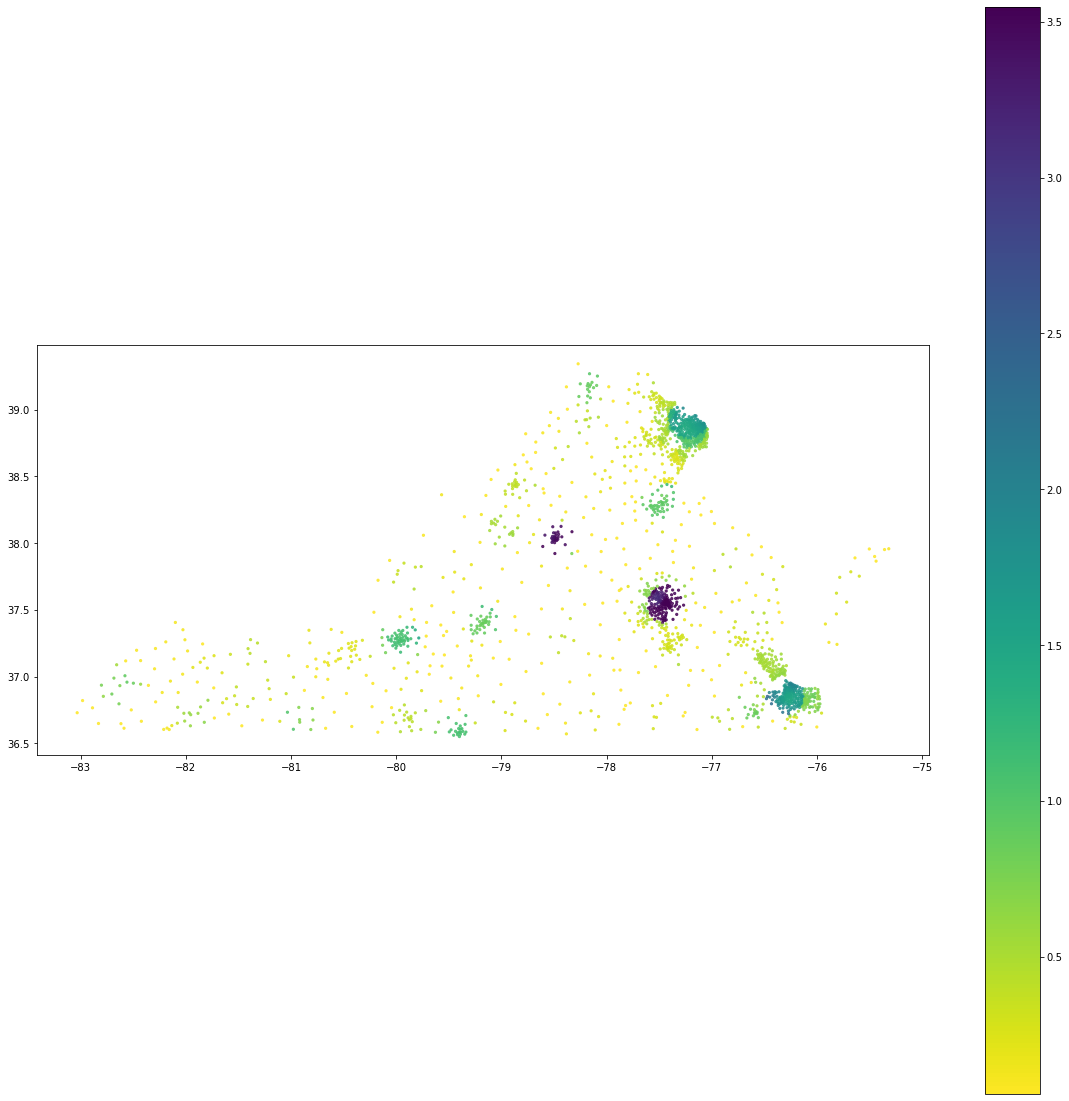

In [39]:
plot("fca_doc")


In [40]:
B.weighted_catchment    (name = "gravity",  weight_fn = gravity)

,gravity_doc
geoid,
51001090100,8.039688e+05
51001090200,8.508466e+05
51001090300,9.068989e+05
51001090400,9.070146e+05
51001090500,9.360828e+05
...,...
51840000100,1.704701e+06
51840000201,2.403065e+06
51840000202,2.076865e+06


In [41]:
B.fca_ratio             (name = "fca",      max_cost = 30) # Note - the warning -- good!

/Users/cesarmontalvo/opt/anaconda3/lib/python3.8/site-packages/access/fca.py:137: UserWarning: some tracts may be unaccounted for in supply_cost
  warnings.warn("some tracts may be unaccounted for in supply_cost", stacklevel = 1)
access INFO     :: Overwriting fca_doc.


,fca_doc
geoid,
51001090100,0.001093
51001090200,0.001065
51001090300,0.004671
51001090400,0.004492
51001090500,0.004758
...,...
51840000100,0.015933
51840000201,0.016020
51840000202,0.016020


In [42]:
B.two_stage_fca         (name = "2sfca",    max_cost = 60)

,2sfca_doc
geoid,
51001090100,0.000745
51001090200,0.000833
51001090300,0.000861
51001090400,0.000854
51001090500,0.000965
...,...
51840000100,0.000989
51840000201,0.000899
51840000202,0.000973


In [43]:
B.enhanced_two_stage_fca(name = "2sfca30",  weight_fn = fn30)

,2sfca30_doc
geoid,
51001090100,0.000903
51001090200,0.000856
51001090300,0.000903
51001090400,0.001392
51001090500,0.001686
...,...
51840000100,0.002535
51840000201,0.002536
51840000202,0.002538


In [44]:
B.three_stage_fca       (name = "3sfca")

,3sfca_doc
geoid,
51001090100,0.001072
51001090200,0.000740
51001090300,0.000638
51001090400,0.001728
51001090500,0.001668
...,...
51840000100,0.002485
51840000201,0.002545
51840000202,0.002585


In [45]:
B.access_df

,pop,gravity_doc,fca_doc,2sfca_doc,2sfca30_doc,3sfca_doc
geoid,,,,,,
51001090100,2899,8.039688e+05,0.001093,0.000745,0.000903,0.001072
51001090200,5771,8.508466e+05,0.001065,0.000833,0.000856,0.000740
51001090300,2439,9.068989e+05,0.004671,0.000861,0.000903,0.000638
51001090400,6603,9.070146e+05,0.004492,0.000854,0.001392,0.001728
51001090500,2526,9.360828e+05,0.004758,0.000965,0.001686,0.001668
...,...,...,...,...,...,...
51840000100,7510,1.704701e+06,0.015933,0.000989,0.002535,0.002485
51840000201,3490,2.403065e+06,0.016020,0.000899,0.002536,0.002545
51840000202,5934,2.076865e+06,0.016020,0.000973,0.002538,0.002585


save the file 

In [47]:
B.access_df.to_csv(index=False);

In [48]:
B.access_df.to_csv("B.access_df.csv")

# lab

In [62]:
import pandas as pd
import censusdata
